In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Question 1

The data for the radioactive decay of protactinium, Pa (a beta emitter) can be "collected" by viewing this YouTube video: https://www.youtube.com/watch?v=214cwT4v3D8. Please be sure to record all data points and note the information pertaining to background, as well as count and wait periods, at the start of the video.

- Plot appropriate graphs to:
    - Show the decay of Pa
    - Determine the rate constant
    - Demonstrate that your rate constant is correct ('fit' the data)

In [2]:
# First task is to read in the data as a pair of arrays
time = np.array([0., 12.5, 25., 37.5, 50., 62.5, 75., 87.5, 100., 
        112.5, 125., 137.5, 150., 162.5, 175., 187.5, 
        200, 212.5, 225., 237.5, 250., 262.5, 275.])
counts = np.array([292, 253, 219, 183, 184, 154, 144, 109, 112, 
          107, 70, 69, 48, 54, 43, 53, 46, 27, 22, 
          22, 24, 22, 17])

# And the background as a float
background = 6.

In [3]:
# The counts can then be corrected
counts = counts - background

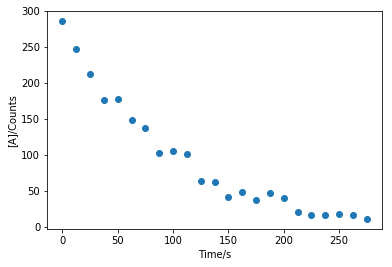

In [4]:
# And the raw data plotted
plt.plot(time, counts, 'o')
plt.xlabel('Time/s')
plt.ylabel('[A]/Counts')
plt.show()

The exponential decay in this data should be clear.

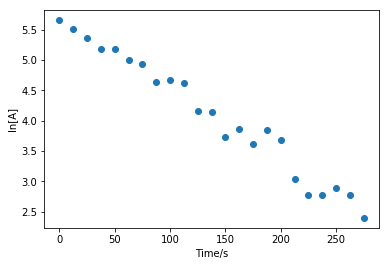

In [5]:
# Plot with a log y-axis
plt.plot(time, np.log(counts), 'o')
plt.xlabel('Time/s')
plt.ylabel('ln[A]')
plt.show()

In [6]:
# Use linregress to get the straightline 
data = linregress(time, np.log(counts))
print(data)

LinregressResult(slope=-0.011672027300423831, intercept=5.7107189362724249, rvalue=-0.9872120306252361, pvalue=3.1170337065838762e-18, stderr=0.00041129090479511706)


The rate constant is the negative of the slope, while the initial count is the exponential of the intercept.

In [7]:
k = -data.slope
print('The rate constant is {:.4f} s^-1'.format(k))
A0 = np.exp(data.intercept)
print('The initial counts is {:.4f}'.format(A0))

The rate constant is 0.0117 s^-1
The initial counts is 302.0882


It is then possible to check the agreement using the integrated rate law

$$ [\text{A}] = [\text{A}]_0\exp{(-kt)} $$

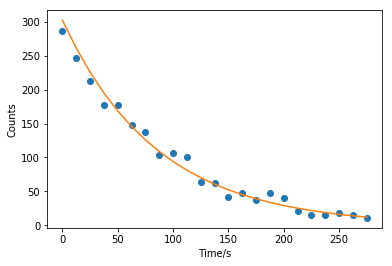

In [8]:
def check(t, k, A0):
    return A0 * np.exp(-k * t)

plt.plot(time, counts, 'o')
plt.plot(time, check(time, k, A0))
plt.xlabel('Time/s')
plt.ylabel('Counts')
plt.show()

- Determine the half-life for the radioactive decay of Pa

The half life can be found, 

$$ t_{1/2} = \dfrac{\ln{2}}{k} $$

In [9]:
t12 = np.log(2) / k
print('The half life of the decay is {:.4f} s'.format(t12))

The half life of the decay is 59.3853 s


### Question 2

The acid catalysed bromination of propanone was investigated using the initial rate method at 298 K. The initial rate of reaction was determined for a range of initial concentration of reactants as shown in the table below. 

$$ \text{CH}_3\text{COCH}_3 \text{ (aq)} + \text{Br}_2\text{ (aq)} + \text{H}^+\text{ (aq)} \rightarrow \text{CH}_3\text{COCH}_2\text{Br} \text{ (aq)} + \text{Br}^-\text{ (aq)} + 2\text{H}^+\text{ (aq)}$$

| Exp # | [$\text{CH}_3\text{COCH}_3$] | [$\text{Br}_2$] | [$\text{H+}_2$] | Initial rate/$10^{-5}$ moldm$^{-3}$s$^{-1}$ |
|------|------|------|------|------|
| 1 | 0.30 | 0.05 | 0.05 | 5.60 | 
| 2 | 0.30 | 0.10 | 0.05 | 5.60 | 
| 3 | 0.30 | 0.05 | 0.10 | 11.1 |
| 4 | 0.40 | 0.05 | 0.20 | 30.5 |
| 5 | 0.40 | 0.05 | 0.05 | 7.55 |

- Determine the order of the reaction with respect to each of the three substances listed in the table. Please explain your reasoning in each case. 

Compare Exp #1 and #5 to determine rate with respect to $\text{CH}_3\text{COCH}_3$.

In [ ]:
conc1 = 0.3
conc5 = 0.4 
rate1 = 5.6
rate5 = 7.55

(rate5 / rate1) / (conc5 / conc1)

1st order.

Compare Exp #1 and #2 to determine rate with respect to $\text{Br}_2$.

In [ ]:
conc1 = 0.05
conc2 = 0.10
rate1 = 5.6
rate2 = 5.6

(rate2 / rate1) / (conc2 / conc1)

No change with increasing concentration, therefore 0th order.

Compare Exp #1 and #3 to determine rate with respect to $\text{H}^+$.

In [ ]:
conc1 = 0.05
conc3 = 0.10
rate1 = 5.6
rate3 = 11.1

(rate3 / rate1) / (conc3 / conc1)

1st order.

- Explain how one would measure initial rates. Include in your answer any constraints that would be likely to occur, or approximations that would be made. 

At low extent of reaction, e.g. $<10$ % reactant consumption, the tangent to the decay can be approximated by $\frac{\Delta [\text{A}]}{\Delta t}$, so may be determined from the gradient of this tangent. Thus the constraint is that this only holds at low reactant consumption and the approximation is that the tangent to the curve at $t_0$ is $\frac{\Delta [\text{A}]}{\Delta t}$.

### Question 3

The following data were recorded for the ring opening polymerisation fo lactide (LA) to form polylactide (PLA), a sustainable alternative to petrochemically derived polymers. The concentration of catalyst was 0.00167 dm$^{-3}$. 

| Time/min | LA concentration/moldm$^{-3}$ |
|------|------|
| 11 | 0.45 |
| 19 | 0.38 | 
| 27 | 0.30 |
| 35 | 0.24 |

- Derive the integrated first order rate equation. 

$$ -\frac{d[\text{A}]}{dt} = k'[\text{A}] $$

$$ -\frac{1}{[\text{A}]}d[\text{A}] = kdt $$

$$ -\int_{[\text{A}]_0}^{[\text{A}]_t}\frac{1}{[\text{A}]}d[\text{A}] =  \int_{0}^{t}kdt $$

$$ -(\ln{[\text{A}]_t} - \ln{[\text{A}]_0}) = kt $$

$$ \ln{[\text{A}]_0} - \ln{[\text{A}]_t} = kt $$

$$ \ln{\frac{[\text{A}]_0}{[\text{A}]_t}} = kt $$

- Using suitable graphical methods, determine the rate constant for the polymerisation of LA to form PLA.

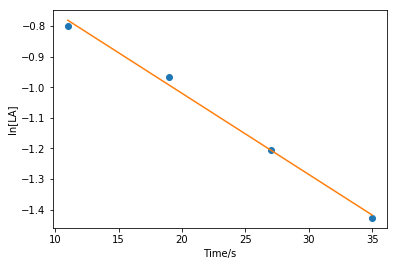

In [10]:
time = np.array([11., 19., 27., 35.])
time = time
LA = np.array([0.45, 0.38, 0.30, 0.24])

data = linregress(time, np.log(LA))

plt.plot(time, np.log(LA), 'o')
plt.plot(time, data.slope * time + data.intercept)
plt.xlabel('Time/s')
plt.ylabel('ln[LA]')
plt.show()

In [11]:
k = -data.slope
print('The rate constant is {:.4e} s-1'.format(k))

The rate constant is 2.6528e-02 s-1


- What we have actually done above is apply pseudo first order kinetics. In reality the overall rate law should be as shown below. How would you determine $x$, the order of reaction with respect to catalyst?

$$ -\frac{d[\text{LA}]}{dt} = k[\text{cat}]^x[\text{LA}]^1 $$

$$ k' = k[\text{cat}]^x $$

$$ \ln{k'} = \ln{k} + x \ln{[\text{cat}]} $$

Thus a plot of $\ln{k'}$ vs $\ln{[\text{cat}]}$ will give a straight line with a gradient of $x$. so the experiment would be changing the concentration of catalyst and determining the value of $k'$. 

### Question 4

the Mary Rose (the flag ship of King Henry VIII) sank in 1545 AD and was raised from the Solent in 1982 AD. A piece of the hull was immediately carbon dated and the ratio of $^{14}$C to $^{12}$C in the ship's hull found to be $0.935 \times 10^{-12}$. If the half-life of radioactive $^{14}$C is 5568 years and the ratio of $^{14}$C to $^{12}$C in living biomass is $1.00 \times 10^{-12}$, calculated the age of the piece of wood and thus when the tree it came from was felled. 

$$ k = \frac{\ln{2}}{t_{1/2}} $$

In [10]:
k = np.log(2) / 5568
print('k = {:.2e} years^-1'.format(k))

k = 1.24e-04 years^-1


$$ \ln\frac{[\text{A}]_0}{[\text{A}]_t} = kt $$

$$ t = \frac{\ln\frac{[\text{A}]_0}{[\text{A}]_t}}{k} $$

In [11]:
A0 = 1e-12
At = 0.935e-12
t = (np.log(A0 / At)) / k
print('t = {:.0f} years'.format(t))

t = 540 years


In [12]:
raised = 1982
print('The tree was felled {:.0f} AD'.format(raised - t))

The tree was felled 1442 AD
